In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LIBRERIAS PARA EL DESCENSO DEL GRADIENTE

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# CARGAMOS NUESTRO DATASET

In [4]:
penguins_df = sns.load_dataset('penguins').dropna()
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# DEFINIMOS VARIABLE DEPENDIENTE E INDEPENDIENTE(x y y)

In [ ]:
X = penguins_df[['flipper_length_mm']].values
y = penguins_df['body_mass_g'].values
print(X,y)

# REALIZAMOS UNA NORMALIZACIÓN DE DATOS

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
y_scaled = (y - np.mean(y)) / np.std(y) # normalización manual
y_scaled

# DEFINIR EL MODELO DE DESCENSO DEL GRADIENTE

In [ ]:
model = SGDRegressor(max_iter=1000,learning_rate='optimal',eta0=0.01)
model.fit(X_scaled,y_scaled)
y_pred = model.predict(X_scaled)
y_pred

# GRAFICAMOS LOS RESULTADOS

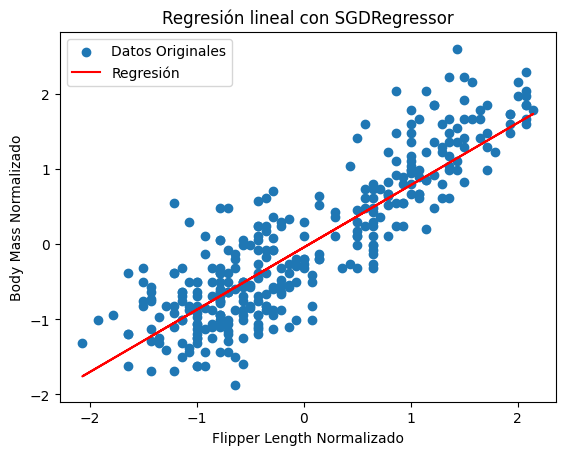

In [12]:
plt.scatter(X_scaled,y_scaled,label='Datos Originales')
plt.plot(X_scaled,y_pred,color='red',label='Regresión')
plt.xlabel("Flipper Length Normalizado")
plt.ylabel("Body Mass Normalizado")
plt.title("Regresión lineal con SGDRegressor")
plt.legend()
plt.show()

# PREDICCIÓN

In [13]:
nuevo_valor = np.array([[210]])
nuevo_valor_scaled = scaler.transform(nuevo_valor)
prediccion_scaled = model.predict(nuevo_valor_scaled)

prediccion_real = prediccion_scaled * np.std(y) + np.mean(y)
print(f'Predicción de Body mass para un flipper_lenght de 210 {prediccion_real}')

Predicción de Body mass para un flipper_lenght de 210 [4603.4008517]
